<a href="https://colab.research.google.com/github/RobertTalbert/linalg-diffeq/blob/main/tutorials/Solving_DEs_algebraically_in_SymPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sympy import *
init_printing()

# Solving DE's algebraically in SymPy

This tutorial will walk through the process of using SymPy's powerful symbolic capabilities to solve differential equations symbolically (when possible). 

There are several steps involved here that aren't what we as humans would do when solving a DE, and which don't have anything to do with differential equations, but which are necessary in order to get SymPy to understand what we want.  

## Equations, symbols, and functions in SymPy

As described in [the previous tutorial on symbolic computation in SymPy](https://github.com/RobertTalbert/linalg-diffeq/blob/main/tutorials/Defining_symbolic_variables_in_SymPy.ipynb), in order for SymPy to tell the difference between a numeric variable (that is just a container for a number) and a symbolic variable (that is to be treated as an abstract symbol), we have to tell SymPy what we want, using the `var` command. For example, here we'll define $x$ and $t$ as symbols: 

In [2]:
x,t = var("x t")

*Equations* that involve symbolic variables in SymPy have to be defined in a special way using the command `Eq` (note the capital "E"). This command takes two inputs, which are the left and right sides of the equation you want. For example here is the (basic algebra) equation $\sin(x) + \cos(t^2) = 1$. The first line defines the equation and stores the equation in its own variable, `eq`. The second line prints the equation out. (The second part is optional; just included here so we can see what we did.)

In [3]:
eq = Eq(sin(x) + cos(t**2), 1)
eq

In computer science language, what's happening here is we are "instantiating" an object of "class `Eq`".

Once we've defined the equation, we can use `solve` to solve it for one of the variables: 

In [4]:
# Solve the equation for x
solve(eq, x)

In [5]:
# Solve for t
solve(eq, t)

These two variables $x$ and $t$ weren't defined as having any relationship to each other --- they're just two variables. But if we want to define a variable to be **a function** of one of the others, we do so using the special command `Function` instead of `var`. For example, let's define a new variable $y$ that is a function of $t$: 

In [6]:
y = Function("y")

Notice we didn't have to say what the independent variable was! We are just giving SymPy a heads-up that $y$ depends on another variable. The input variable will be declared once we have a differential equation in front of us. 

## Setting up and solving DE's 

If `y` has been defined as a function, then "the derivative of `y` with respect to `t`" is: 

```diff(y(t), t)```

You can use the `diff` command by itself to simply take derivatives, if you're doing calculus:

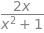

In [7]:
diff(log(x**2 + 1), x)

But if we are solving a differential equation, `diff(y(t),t)` is shorthand for $y'(t)$ or $\frac{dy}{dt}$. With that shorthand, entering in a differential equation in SymPy works like entering in any other kind of equation.

**Example:** The differential equation $\frac{dy}{dt} = 0.2y$ is: 

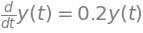

In [8]:
# Again, inside Eq you put the left side, then the right side.
# Note that it has to be y(t), not just y. 

de1 = Eq(diff(y(t),t), 0.2*y(t))
de1

**Example:** Here is the differential equation $y' + y \tan(t) = \cos(t)$ (example 2.3.3 in the text): 

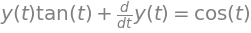

In [9]:
de2 = Eq(diff(y(t),t) + y(t)*tan(t), cos(t))
de2

To *solve* a DE, however, we use the special command `dsolve` (not just `solve`): 

In [10]:
# There are two inputs: The equation itself, and the function you want to solve for
dsolve(de1, y(t))

In [11]:
dsolve(de2, y(t))

## Initial Value Problems

To solve an initial value problem, it's the same process, except we need to give `dsolve` the initial conditions. These are entered as a third input to `dsolve`. The input have to be entered in a paricular way: It must start with `ics =` and followed by a set that specifies each initial condition. (It's technically a "dictionary" in Python.) 

The best way to understand this is with examples.

**Example:** Solve the IVP $y' = y - t$, $y(0) = 4$.  

In [12]:
# Set up the equation first 
ivp_example = Eq(diff(y(t),t), y(t) - t)

# Note the format for the initial condition
dsolve(ivp_example, y(t), ics = {y(0): 4})

**Example:** Solve the IVP $y' + \frac{2}{t}y = e^t$, $y(1) = 4$. (Exercise 31 on page 146)

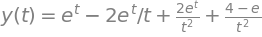

In [13]:
ivp_example2 = Eq(diff(y(t), t) + (2/t)*y(t), exp(t))
soln = dsolve(ivp_example2, y(t), ics = {y(1): 4})
soln

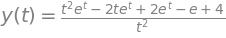

In [14]:
# You can use "simplify" to get this all into one big fraction
simplify(soln)

**Example:** (From class on February 21) Acceleration due to gravity near the Earth's surface is $-32$ feet per second per second. Suppose an object is launched into the air from 6 feet above the ground with an initial velocity of 10 feet per second. Find a formula for its position at time $t$ seconds. 

**Solution:** Let $y(t)$ be its height above the ground. Then $y'' = -32$, $y(0) = 6$, and $y'(0) = 10$. Therefore: 

In [15]:
# Adding the 2 inside diff tells SymPy it's the second derivative
deq = Eq(diff(y(t),t,2), -32)

# This time there are two initial conditions
# Just comma-separate them inside the set of IC's
# The complicated expression you see is just y'(0) 

dsolve(deq, y(t), ics = {y(0): 6, diff(y(t),t).subs(t,0): 10})